In [148]:
from train import train, load_model
from models import CustomDensenet, CustomVit
from dataset import Rxrx1
from config import Config
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import v2
import torch
from torchvision.models import vit_b_16, vit_b_32, vit_l_16, VisionTransformer, ViT_B_16_Weights
from losses import Schedulers

from torchvision import transforms
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
tr = transforms.Compose([ transforms.RandomHorizontalFlip()])

In [67]:
# model = vit_b_32()
model = vit_l_16(weights= None)

In [68]:
backbone = 'vit_b_16'
_model =  getattr(torchvision.models, backbone)

In [70]:
_model(pretrained = True, patch_size = 7)

/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


TypeError: torchvision.models.vision_transformer._vision_transformer() got multiple values for keyword argument 'patch_size'

In [81]:
model.patch_size

16

In [ ]:
CustomVit(image_size =225, num_classes = 5)

In [211]:
config = Config.load_config('/Users/jasonwang/github/recursion/src/example_config.yaml')

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, LinearLR, ExponentialLR, PolynomialLR
from enum import Enum
optimizer = torch.optim.AdamW(model.parameters(), lr= 1e-3)

In [153]:
optimizer = torch.optim.AdamW(model.parameters(), lr= 1e-3)
# sched = CosineAnnealingWarmRestarts(optimizer, T_0=10)
# sched = LinearLR(optimizer, total_iters = 50)
# sched = ExponentialLR(optimizer, gamma = .1)
# sched = PolynomialLR(optimizer, total_iters=5, )
sched = Schedulers.cosine.value(optimizer, T_0= 10)
lrs = []
steps = 5
for _ in range(steps):
    sched.step()
    lrs.extend(sched.get_last_lr())

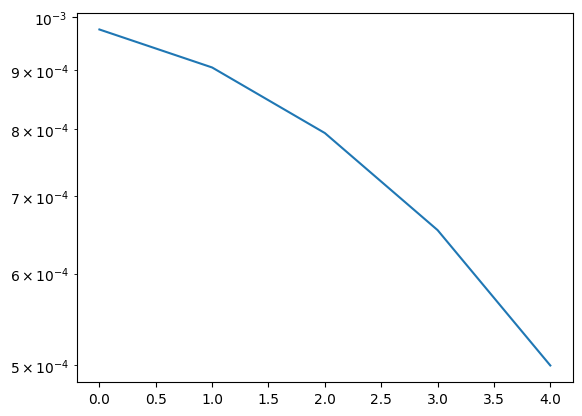

In [154]:
sns.lineplot(x = range(steps), y = lrs)
plt.yscale('log')

In [21]:
l1 = ['resize:224','crop','vertical','horizontal','rotate']
l2 = ['crop','vertical','horizontal','rotate']

[]

In [50]:
# model = vit_b_16(weights = ViT_B_16_Weights, image_size = 240)
model = vit_b_16(image_size = 240, num_classes =7)

In [53]:
                            Rxrx1(split = 'test', num_categories= 5,
                                    data_transform= transforms.Resize(32)), 
                            batch_size=10, 
                            shuffle=False, 
                            num_workers=1

In [54]:
test_dataloader = iter(DataLoader(
                            Rxrx1(split = 'test', num_categories= 5,
                                    data_transform= transforms.Resize(32)), 
                            batch_size=10, 
                            shuffle=False, 
                            num_workers=1
                            ))

In [55]:
next(test_dataloader)

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/jasonwang/github/recursion/src/dataset.py", line 99, in __getitem__
    x = torch.cat([self.transform(Image.open(p)) for p in full_paths], dim =0)
TypeError: expected Tensor as element 0 in argument 0, but got Image


In [ ]:
[int(s.split(':')[-1])for s in l2 if 'resize' in s]

In [35]:
model = vit_b_16(image_size = 224,num_classes = 5, dropout = 0.2)# pretrained = True)

In [45]:
for x in model.children():
    print(x)
    print('=='*10)

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
Encoder(
  (dropout): Dropout(p=0.2, inplace=False)
  (layers): Sequential(
    (encoder_layer_0): EncoderBlock(
      (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (self_attention): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
      )
      (dropout): Dropout(p=0.2, inplace=False)
      (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): MLPBlock(
        (0): Linear(in_features=768, out_features=3072, bias=True)
        (1): GELU(approximate='none')
        (2): Dropout(p=0.2, inplace=False)
        (3): Linear(in_features=3072, out_features=768, bias=True)
        (4): Dropout(p=0.2, inplace=False)
      )
    )
    (encoder_layer_1): EncoderBlock(
      (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (self_attention): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_f

In [43]:
x

Sequential(
  (head): Linear(in_features=768, out_features=5, bias=True)
)

In [10]:
model

[autoreload of models failed: Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/jasonwang/github/recursion/src/models

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [9]:
for c in model.named_children():
    # print(len(c))
    print(c[0])

conv_proj
encoder
heads


In [3]:
config = Config.load_config('/Users/jasonwang/github/recursion/src/example_config.yaml')

In [4]:
from torch.utils.data.dataloader import default_collate

dataset = Rxrx1()
cutmix = v2.CutMix(num_classes=config.num_categories)
train_collate_fn = lambda batch: cutmix(*default_collate(batch))

In [5]:
dataset = Rxrx1(split = 'train', num_categories= config.num_categories)

In [10]:
batch = dataset[0]
x, cell_type, labels = batch

In [20]:
batch_list = [dataset[0], dataset[1]]

In [22]:
ex = default_collate(batch_list)

In [27]:
ex[0].shape, ex[1].shape, ex[2].shape

(torch.Size([2, 6, 384, 384]), torch.Size([2]), torch.Size([2]))

In [ ]:
def custom_collate_fn(batch_list):
    # each batch contains: x (img tensor), cell_type (int), label (int)
    x_stack = torch.stack([item[0] for item in batch_list], dim = 0)
    cell_type_stack = torch.stack([item[1] for item in batch_list], dim = 0)
    label_stack = torch.stack([item[2] for item in batch_list], dim = 0)
    x_stack, label_stack = cutmix(x_stack, label_stack)
    return x_stack, cell_type_stack, label_stack


In [29]:
torch.stack([x,x,x], dim = 1).shape

torch.Size([6, 3, 384, 384])

In [9]:
default_collate((batch[0], batch[2]))

TypeError: expected Tensor as element 1 in argument 0, but got numpy.int64

In [44]:
dataset.meta['sirna_codes'].nunique()

2

In [ ]:
train_dataloader = iter(DataLoader(Rxrx1(split = 'train', ), batch_size=12, shuffle=True, num_workers=1, collate_fn=train_collate_fn))

In [35]:
from functools import partial

In [36]:
def ex(x,y):
    return x**y

In [37]:
pex = partial(ex, y= 3)

In [38]:
pex(2)

8

In [28]:
cutmix = v2.CutMix(num_classes=15)

In [22]:
a,b,c = next(train_dataloader)

In [29]:
cutmix(a,b)

(tensor([[[[-3.3993e-01, -3.3993e-01, -3.3993e-01,  ..., -5.0203e-01,
            -5.0203e-01, -5.0203e-01],
           [-1.7783e-01, -1.7783e-01, -1.7783e-01,  ..., -5.0203e-01,
            -5.0203e-01, -5.0203e-01],
           [-1.5734e-02,  1.4637e-01,  1.4637e-01,  ..., -5.0203e-01,
            -5.0203e-01, -5.0203e-01],
           ...,
           [-5.9867e-01, -5.4380e-01, -5.4380e-01,  ..., -1.5734e-02,
            -1.5734e-02, -1.5734e-02],
           [-5.9867e-01, -5.4380e-01, -5.4380e-01,  ..., -1.7783e-01,
            -1.5734e-02, -1.5734e-02],
           [-5.9867e-01, -5.4380e-01, -5.4380e-01,  ..., -1.7783e-01,
            -1.7783e-01, -1.5734e-02]],
 
          [[-9.2936e-01, -9.2936e-01, -9.2936e-01,  ..., -8.6784e-02,
            -8.6784e-02, -2.5262e-03],
           [-9.2936e-01, -9.2936e-01, -9.2936e-01,  ..., -2.5530e-01,
            -8.6784e-02, -1.7104e-01],
           [-8.4510e-01, -8.4510e-01, -8.4510e-01,  ..., -3.3956e-01,
            -3.3956e-01, -5.0807e-01],


In [30]:
q,w,e = ((1,2),3)

ValueError: not enough values to unpack (expected 3, got 2)

In [31]:
q

NameError: name 'q' is not defined

In [25]:
a.dtype, b.dtype, c.dtype

(torch.float32, torch.int64, torch.int64)

In [ ]:
c.d

In [15]:
train(config)

/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
INFO:train:Epoch 0
0it [00:04, ?it/s]


KeyboardInterrupt: 

In [63]:
Config(data_augmentation=['vertical'])

[autoreload of config failed: Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/diffusion/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/jasonwang/github/recursion/src/config

TypeError: super(type, obj): obj must be an instance or subtype of type

In [46]:
inputs['data_augmentation']

list

In [39]:

basic_augmentations = set(['vertical', 'horizontal', 'crop:284', 'rotate', 'cutmix'])

In [40]:
set(['rotate','arst']) - basic_augmentations

{'arst'}

In [ ]:
CustomDensenet(5)

In [ ]:
load_model('densenet121')

In [ ]:
getattr(torchvision.models, 'densenet121')(pretrained=True)

In [ ]:
'ARST'.lower()